Bài 1: thực hiện 1 RNN với data set đơn giản, dự đoán số hành khách theo tháng

https://medium.com/analytics-vidhya/rnn-vs-gru-vs-lstm-863b0b7b1573 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler


In [12]:
df = pd.read_csv("./data/airline-passengers.csv")
df.head()

,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
df.drop(['month'],axis=1,inplace=True)
dataset = np.array(df)
dataset.reshape(-1,1)


array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

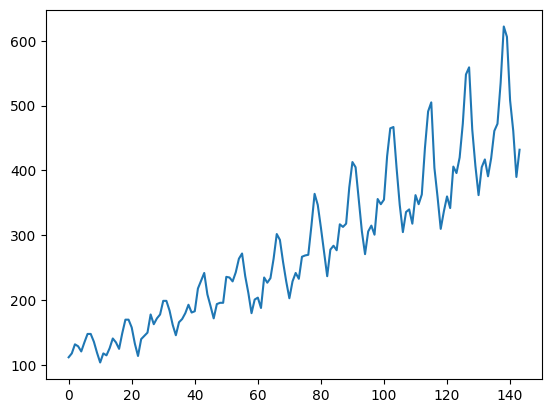

In [14]:
plt.plot(dataset)

In [15]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [22]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train = dataset[:train_size,:]
test = dataset[train_size:142,:]
def getdata(data,lookback):
    X,Y=[],[]
    for i in range(len(data)-lookback-1):
        X.append(data[i:i+lookback,0])
        Y.append(data[i+lookback,0])
    return np.array(X),np.array(Y).reshape(-1,1)
lookback = 1
X_train, y_train = getdata(train, lookback)
X_test, y_test = getdata(test, lookback)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [23]:
model=Sequential()
model.add(LSTM(5,input_shape=(1,lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\app\python\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train, y_train, epochs=50, batch_size=1)
y_pred=model.predict(X_test)
y_test=scaler.inverse_transform(y_test)
y_pred=scaler.inverse_transform(y_pred)

Epoch 1/50


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0522  
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0174   
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0127
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0109
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0105
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067   
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032   
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025   
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031
Epoch 14/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 15/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

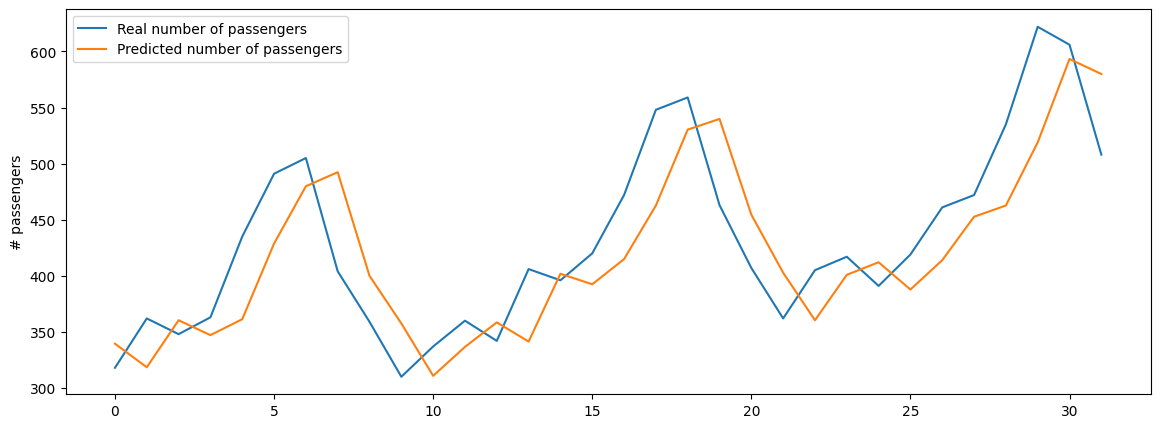

In [26]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2485.6852303786727